In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

Se necesita

$y$: función que queremos determinar

$g = g(y,t)$: derivada de y

# Second-Order Runge-Kutta Method

$$y(t+\Delta t) = y + \frac{1}{2} [k_1 + k_2] + \phi(\Delta t^2)$$

$$k_1 = g(y,t)\Delta t$$

$$k_2 =  g(y + k_1, t + \Delta t) \Delta t$$

In [13]:
def rk2(y, time, dt, deriv):
    k1 = dt * deriv(y,time)
    k2 = dt * deriv(y + k1, time + dt)
    
    return y + 0.5*(k1+k2)

# Fourth-Order Runge-Kutta Method

$$y(t+\Delta t) = y + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4) + \phi(\Delta t^3)$$

$$k_1 = g(y,t)\Delta t$$

$$k_2 =  g\left(y + \frac{1}{2} k_1, t + \frac{1}{2} \Delta t \right) \Delta t$$

$$k_3 =  g\left(y + \frac{1}{2} k_2, t + \frac{1}{2} \Delta t \right) \Delta t$$

$$k_1 = g(y + k_3,t + \Delta t)\Delta t$$

In [12]:
def rk4(y, time, dt, deriv):
    k1 = dt * deriv(y,time)
    k2 = dt * deriv(y + 0.5*k1, time + 0.5*dt)
    k3 = dt * deriv(y + 0.5*k2, time + 0.5*dt)
    k4 = dt * deriv(y + k3, time + dt)
    
    return y + (k1 + 2*k2 + 2*k3 + k4)/6

# Ejemplo

Spring-mass system and friction

$$\frac{d^2 x}{dt^2} = - \frac{k}{m} x \pm \mu g$$

A un sistema de dos EDOs de primer orden

$$\dot{x} = v$$

$$\dot{v} = -\frac{k}{m} x \pm \mu g$$

In [50]:
# Condiciones iniciales y parámetros

N = 1000 #steps
tau = 3.0 #tiempo de simulación
dt = tau/(N-1)

x0 = 0.2
v0 = 0.0

k = 42.0
m = 0.25
gravity = 9.81
mu = 0.15

In [24]:
''' Array con los valores de x y v
    y[0,:] posición de la masa
    y[1,:] velocidad de la masa '''

y = np.zeros((N,2))
y[0,0] = x0
y[0,1] = v0

In [25]:
''' Definimos la EDO o sistema de EDOs, en este caso:
    dx/dt = v
    dv/dt = -k/m x +/- mu*g
    
    Es deriv en rk2 o rk4 
    state = (x,v) '''

def SpringMass(state,time):
    dot0 = state[1]
    
    if dot0 > 0:
        dot1 = -k/m * state[0] - gravity * mu
    else:
        dot1 = -k/m * state[0] + gravity * mu
        
    return np.array([dot0,dot1])

In [26]:
# Resolvemos la EDO para cada elemento en y

for j in range(N-1):
    y[j+1] = rk4(y[j],0,dt,SpringMass)

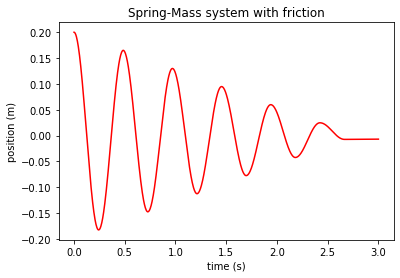

In [27]:
# Plot
t = np.linspace(0,tau,N)

plt.plot(t,y[:,0],'r')
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.title('Spring-Mass system with friction')
plt.show()

# Ejemplo

Springy Pendulum

$$\ddot{L} = (L_0 + L) \dot{\theta}^2 - \frac{k}{m} L + g \cos \theta$$

$$\ddot{\theta} = - \frac{1}{L + L_0} [g \sin \theta + 2 \dot{L} \dot{\theta}]$$

A un sistema de cuatro EDOs de primer orden

$$\dot{L} = K$$

$$\dot{K} = (L_0 + L) \phi^2 - \frac{k}{m} L + g \cos \theta$$

$$\dot{\theta} = \phi$$

$$\dot{\phi} = - \frac{1}{L + L_0} [g \sin \theta + 2 K \phi]$$

In [55]:
''' Sistema de EDOs
    state = (L, K, \theta, \phi)'''

def SpringyPendulum(state,time):
    dot0 = state[1]
    dot1 = (L0 + state[0])*state[3]*state[3] - k*state[0]/m + gravity*cos(state[2])
    dot2 = state[3]
    dot3 = -(gravity*sin(state[2]) + 2*state[1]*state[3])/(state[0] + L0)
    
    return np.array([dot0,dot1,dot2,dot3])

In [54]:
# Condiciones iniciales y parámetros

N = 5000 #steps
tau = 25.0 #tiempo de simulación
dt = tau/(N-1)

x0 = 0.2
v0 = 0.0

k = 3.5
m = 0.2
gravity = 9.81
mu = 0.15

L = 1.0 #Longitud natural

L0 = 1.0 
K0 = 0.0
theta0 = 0.3
phi0 = 0.0

In [56]:
y1 = np.zeros((N,4))

y1[0,0] = L0
y1[0,1] = K0
y1[0,2] = theta0
y1[0,3] = phi0

In [57]:
for j in range(N-1):
    y1[j+1] = rk4(y1[j],0,dt,SpringyPendulum)

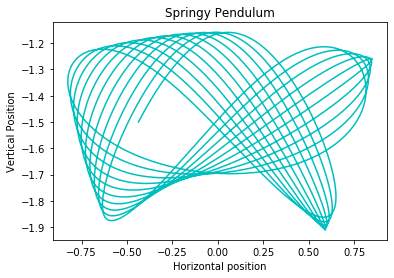

In [59]:
# Plot: Trayectoria

x = (L + y1[:,0])*np.sin(y1[:,2])
y = -(L + y1[:,0])*np.cos(y1[:,2])

plt.plot(x,y,'c')
plt.xlabel('Horizontal position')
plt.ylabel('Vertical Position')
plt.title('Springy Pendulum')
plt.show()